# Exemplo Básico do Método de Lattice Boltzmann em Python

Este exemplo ilustra uma implementação muito básica do método de Lattice Boltzmann em Python. O objetivo é simular o fluxo de um fluido em uma rede bidimensional.

## Parâmetros Iniciais
- Tamanho da rede (`n`): 100.
- Tempo de relaxação (`tau`): 0.6.
- Número de iterações (`n_iter`): 100.
- Velocidade inicial (`vel`): 0.1.

## Direções e Pesos (Modelo D2Q9)
- Vetor de direções (`v`): inclui 9 direções (verticais, horizontais e diagonais).
- Pesos (`w`): atribuídos a cada uma das 9 direções.

## Inicialização
- Inicializa a função de distribuição (`f`) com um peso para cada direção e uma velocidade inicial.

## Loop Principal
- **Colisão**: Ajusta a função de distribuição (`f`) para se aproximar de um equilíbrio (`feq`).
- **Streaming**: Move as partículas pela rede conforme as direções definidas.

## Visualização
- Mostra a densidade do fluido após o número definido de iterações, utilizando `matplotlib`.

Este exemplo serve como uma introdução ao método de Lattice Boltzmann, focando em conceitos básicos e visualização do fluxo do fluido.


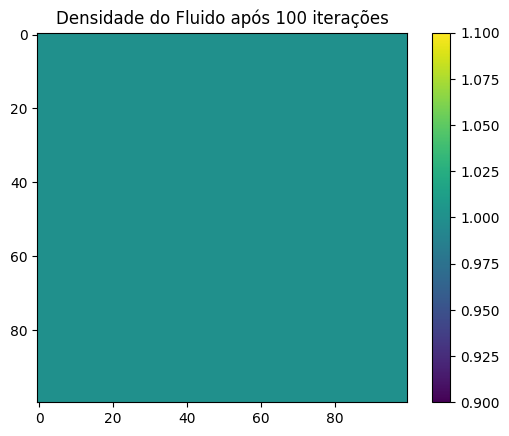

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros iniciais
n = 100  # Tamanho da rede
tau = 0.6  # Tempo de relaxação
n_iter = 100  # Número de iterações
vel = 0.1  # Velocidade inicial

# Direções para partículas (D2Q9)
v = np.array([[1, 0], [0, 1], [-1, 0], [0, -1], [1, 1], [-1, 1], [-1, -1], [1, -1], [0, 0]])

# Peso para cada direção
w = np.array([1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36, 4/9])

# Função de distribuição
f = np.ones((n, n, 9)) * w

# Inicialização do fluxo
for i in range(9):
    f[:, :, i] = w[i] * (1 + 3*v[i, 0]*vel)

# Loop principal
for t in range(n_iter):
    # Colisão
    feq = np.zeros_like(f)
    rho = np.sum(f, axis=2)
    u = np.dot(f, v) / rho[..., None]
    for i in range(9):
        cu = 3 * np.dot(u, v[i])
        feq[:, :, i] = rho * w[i] * (1 + cu + 0.5 * cu**2 - 1.5 * np.sum(u**2, axis=-1))

    f += -(1.0/tau) * (f - feq)

    # Streaming
    for i in range(9):
        f[:, :, i] = np.roll(f[:, :, i], v[i], axis=(0, 1))

# Visualização
plt.imshow(np.sum(f, axis=2))
plt.colorbar()
plt.title('Densidade do Fluido após {} iterações'.format(n_iter))
plt.show()
